In [3]:
# check the observation spatial distribution between two experiments at the same cycle:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [4]:
#exps=['v2','v2_hydro']
exps=['test']
instr='atms'
#sat='n15'
sat='n20'
gesanl='ges'
time='2024070312'

fn=f'diag_{instr}_{sat}_{gesanl}.{time}.nc4'

expids = {  'v2':       'shield2022v2_cycled_C192c',
            'v2_hydro': 'shield2022v2fullhydro_cycled_C192b',
            'v3_hydro': 'shield2022v3_cycled_C192'}

colors = ['blue','green']

dataroot = '/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/scrub/radstats'

In [5]:
rr={};
for exp in exps:
    #rr[exp] = nc.Dataset(f"{dataroot}/{expids[exp]}/{instr}/{fn}")
    rr[exp] = nc.Dataset(f"/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/scrub/CYCLED/CTRL_hydro/gdas.20240703/12/analysis/atmos/tmp/{fn}")

In [6]:
lat_use={}; lon_use={}; obserr_use={}; inv_obserr_use={}; cloud_use={}; clouddiff_use={}; omf_use={}; omfnbc_use={};
lat_all={}; lon_all={}; qc_all={}; cld_rbc_idx_use={}; clw_obs_use={}; clw_model_use={}; clw_model_nobc_use={}; varbc_idx_use={};
bc_cnst_use={}; varbc_idx_use={}; fwater_use={};
cldeff_obs_use={}; cldeff_model_use={}; cld_ch3_obs_use={}; cld_ch3_model_use={}; 
cld_lwpsi_obs_use={}; cld_lwpsi_model_use={};

Jq_use={}; Jt_use={}; Jql_use={}; Jqi_use={}; Jqr_use={}; Jqs_use={}; Jqg_use={};
pres_use={}; t_use={}; qv_use={};
ql_use={}; qi_use={}; qr_use={}; qs_use={}; qg_use={};

#norm_omf_use={}; norm_omf_all={};

for exp in exps:
    ch         = rr[exp].variables['Channel_Index'][:]
    lat        = rr[exp].variables['Latitude'][:]
    lon        = rr[exp].variables['Longitude'][:]
    inv_obserr = rr[exp].variables['Inverse_Observation_Error'][:]
    
    if 'Sym_Observation_Error' in rr[exp].variables:
        obserr     = rr[exp].variables['Sym_Observation_Error'][:]
        
    clw_obs    = rr[exp].variables['clw_obs'][:]
    clw_model  = rr[exp].variables['clw_guess_retrieval'][:]

    omf        = rr[exp].variables['Obs_Minus_Forecast_adjusted'][:]
    omfnbc     = rr[exp].variables['Obs_Minus_Forecast_unadjusted'][:]
    fwater     = rr[exp].variables['Water_Fraction'][:]
    symcloud   = 0.5*(clw_obs + clw_model)
    diffcloud  = (clw_obs - clw_model)
    qc         = rr[exp].variables['QC_Flag'][:]
    
    if 'clw_guess_retrieval_nobc' in rr[exp].variables:
        clw_model_nobc = rr[exp].variables['clw_guess_retrieval_nobc'][:]
    if 'VarBC_Data_Control_Index' in rr[exp].variables:
        varbc_idx = rr[exp].variables['VarBC_Data_Control_Index'][:]

    if 'Cloud_Effect_Obs' in rr[exp].variables:
        cldeff_obs = rr[exp].variables['Cloud_Effect_Obs'][:]
    if 'Cloud_Effect_Model' in rr[exp].variables:
        cldeff_model = rr[exp].variables['Cloud_Effect_Model'][:]
    if 'Cloud_Proxy_Ch3_Obs' in rr[exp].variables:
        cld_ch3_obs = rr[exp].variables['Cloud_Proxy_Ch3_Obs'][:]
    if 'Cloud_Proxy_Ch3_Model' in rr[exp].variables:
        cld_ch3_model = rr[exp].variables['Cloud_Proxy_Ch3_Model'][:]
    if 'Cloud_Proxy_LWP_SI_Obs' in rr[exp].variables:
        cld_lwpsi_obs = rr[exp].variables['Cloud_Proxy_LWP_SI_Obs'][:]
    if 'Cloud_Proxy_LWP_SI_Model' in rr[exp].variables:
        cld_lwpsi_model = rr[exp].variables['Cloud_Proxy_LWP_SI_Model'][:]
        
    if 'Inner_domain_Pressure' in rr[exp].variables:
        pres = rr[exp].variables['Inner_domain_Pressure'][:]
    if 'Inner_domain_Temperature' in rr[exp].variables:
        t = rr[exp].variables['Inner_domain_Temperature'][:]
    if 'Inner_domain_Water_Vapor' in rr[exp].variables:
        qv = rr[exp].variables['Inner_domain_Water_Vapor'][:]
    if 'Inner_domain_ql' in rr[exp].variables:
        ql = rr[exp].variables['Inner_domain_ql'][:]
    if 'Inner_domain_qi' in rr[exp].variables:
        qi = rr[exp].variables['Inner_domain_qi'][:]        
    if 'Inner_domain_qr' in rr[exp].variables:
        qr = rr[exp].variables['Inner_domain_qr'][:]
    if 'Inner_domain_qs' in rr[exp].variables:
        qs = rr[exp].variables['Inner_domain_qs'][:]        
    if 'Inner_domain_qg' in rr[exp].variables:
        qg = rr[exp].variables['Inner_domain_qg'][:]

    if 'Jacobian_Temperature' in rr[exp].variables:
        Jt = rr[exp].variables['Jacobian_Temperature'][:]
    if 'Jacobian_Water_Vapor' in rr[exp].variables:
        Jq = rr[exp].variables['Jacobian_Water_Vapor'][:]        
    if 'Jacobian_ql' in rr[exp].variables:
        Jql = rr[exp].variables['Jacobian_ql'][:]  
    if 'Jacobian_qi' in rr[exp].variables:
        Jqi = rr[exp].variables['Jacobian_qi'][:]         
    if 'Jacobian_qr' in rr[exp].variables:
        Jqr = rr[exp].variables['Jacobian_qr'][:] 
    if 'Jacobian_qs' in rr[exp].variables:
        Jqs = rr[exp].variables['Jacobian_qs'][:]   
    if 'Jacobian_qg' in rr[exp].variables:
        Jqg = rr[exp].variables['Jacobian_qg'][:] 
        
    ## define data selection criteria:
    chn = 18 # channel to be examined

    sea_screen  = (fwater>= 0.99)
    #sea_screen  = (fwater< 0.99)
    
    #use          = np.where ( ch==chn )
    #use         = np.where( (ch==chn)&sea_screen )
    #use         = np.where( (qc == 0)&(ch==chn) )
    #use         = np.where( (qc == 0)&(ch==chn)&sea_screen )
    use         = np.where( (qc == 0)&(ch==chn)&sea_screen&(clw_model>0.3))
    #use         = np.where( (qc == 0)&(ch==chn)&sea_screen&(clw_model<0.05))
    #use         = np.where( (qc == 0)&(ch==chn)&sea_screen&(varbc_idx==1) )

    #use         = np.where( (qc == 0)&(ch==chn))
    #use         = np.where( (ch==chn)&sea_screen )
    #use         = np.where( (qc == 0)&(ch==chn)&(cld_rbc_idx==1))
    #use         = np.where( (qc == 0)&(ch==chn)&(varbc_idx==1))

    lat_use[exp]        = lat[use]
    lon_use[exp]        = lon[use]
    obserr_use[exp]     = obserr[use]
    inv_obserr_use[exp] = inv_obserr[use]
    cloud_use[exp]      = symcloud[use]
    clw_obs_use[exp]    = clw_obs[use]
    clw_model_use[exp]  = clw_model[use]
    fwater_use[exp]     = fwater[use]
    
    if 'clw_guess_retrieval_nobc' in rr[exp].variables:    clw_model_nobc_use[exp] = clw_model_nobc[use]
    if 'VarBC_Data_Control_Index' in rr[exp].variables:    varbc_idx_use[exp]   = varbc_idx[use]
    if 'Cloud_Effect_Obs' in rr[exp].variables: cldeff_obs_use[exp] = cldeff_obs[use]
    if 'Cloud_Effect_Model' in rr[exp].variables: cldeff_model_use[exp] = cldeff_model[use]
    if 'Cloud_Proxy_Ch3_Obs' in rr[exp].variables: cld_ch3_obs_use[exp] = cld_ch3_obs[use]
    if 'Cloud_Proxy_Ch3_Model' in rr[exp].variables: cld_ch3_model_use[exp] = cld_ch3_model[use]
    if 'Cloud_Proxy_LWP_SI_Obs' in rr[exp].variables: cld_lwpsi_obs_use[exp] = cld_lwpsi_obs[use]
    if 'Cloud_Proxy_LWP_SI_Model' in rr[exp].variables: cld_lwpsi_model_use[exp] = cld_lwpsi_model[use]

    if 'Inner_domain_Pressure' in rr[exp].variables: pres_use[exp] = np.squeeze(pres[use,:])
    if 'Inner_domain_Temperature' in rr[exp].variables: t_use[exp] = np.squeeze(t[use,:])
    if 'Inner_domain_Water_Vapor' in rr[exp].variables: qv_use[exp] = np.squeeze(qv[use,:])
    if 'Inner_domain_ql' in rr[exp].variables: ql_use[exp] = np.squeeze(ql[use,:])
    if 'Inner_domain_qi' in rr[exp].variables: qi_use[exp] = np.squeeze(qi[use,:])
    if 'Inner_domain_qr' in rr[exp].variables: qr_use[exp] = np.squeeze(qr[use,:])
    if 'Inner_domain_qs' in rr[exp].variables: qs_use[exp] = np.squeeze(qs[use,:])
    if 'Inner_domain_qg' in rr[exp].variables: qg_use[exp] = np.squeeze(qg[use,:])
        
    if 'Jacobian_Temperature' in rr[exp].variables: Jt_use[exp]    = np.squeeze(Jt[use,:])
    if 'Jacobian_Water_Vapor' in rr[exp].variables: Jq_use[exp]    = np.squeeze(Jq[use,:])
    if 'Jacobian_ql' in rr[exp].variables: Jql_use[exp] = np.squeeze(Jql[use,:])
    if 'Jacobian_qi' in rr[exp].variables: Jqi_use[exp] = np.squeeze(Jqi[use,:])
    if 'Jacobian_qr' in rr[exp].variables: Jqr_use[exp] = np.squeeze(Jqr[use,:])
    if 'Jacobian_qs' in rr[exp].variables: Jqs_use[exp] = np.squeeze(Jqs[use,:])
    if 'Jacobian_qg' in rr[exp].variables: Jqg_use[exp] = np.squeeze(Jqg[use,:])
   
    clouddiff_use[exp]  = diffcloud[use]
    omf_use[exp]        = omf[use]
    omfnbc_use[exp]     = omfnbc[use]
        
    qc_all[exp]         = qc[np.where(ch==chn)]
    lat_all[exp]        = lat[np.where(ch==chn)]
    lon_all[exp]        = lon[np.where(ch==chn)]

In [52]:
len(clw_model_use['test'])

5

In [48]:
print(f"{instr} - channel {chn} \n")

data_model = [clw_model_use[exp], np.abs(cldeff_model_use[exp]), cld_ch3_model_use[exp], cld_lwpsi_model_use[exp]]
print(f"model cloud corr =\n {np.corrcoef(data_model)} \n")

data_obs = [clw_obs_use[exp], np.abs(cldeff_obs_use[exp]), cld_ch3_obs_use[exp], cld_lwpsi_obs_use[exp]]
print(f"model cloud corr =\n {np.corrcoef(data_obs)}")

atms - channel 18 

model cloud corr =
 [[1.         0.21241623 0.65563838 0.9799945 ]
 [0.21241623 1.         0.24140869 0.27026568]
 [0.65563838 0.24140869 1.         0.62261373]
 [0.9799945  0.27026568 0.62261373 1.        ]] 

model cloud corr =
 [[1.         0.14072928 0.60947928 0.82199405]
 [0.14072928 1.         0.10329062 0.16779459]
 [0.60947928 0.10329062 1.         0.38988087]
 [0.82199405 0.16779459 0.38988087 1.        ]]


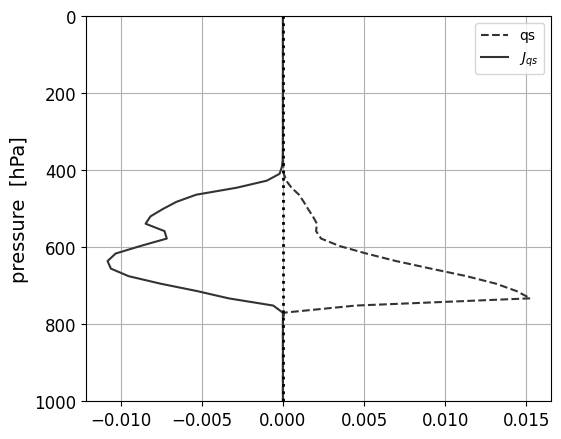

In [79]:
idx=0

fig, ax = plt.subplots(figsize=(6,5))
#ax.plot(t_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='temperature')
#ax.plot(Jt_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), label=r'$J_T$')

#ax.plot(qv_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='water vapor')
#ax.plot(Jq_use[exp][idx,:]*qv_use[exp][idx,:]*0.1, pres_use[exp][idx,:], color=(0.2,0.2,0.2), label=r'$J_{qv}$')

#ax.plot(ql_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='ql')
#ax.plot(Jql_use[exp][idx,:]*ql_use[exp][idx,:]*0.1, pres_use[exp][idx,:], color=(0.2,0.2,0.2), label=r'$J_{ql}$')

#ax.plot(qi_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='qi')
#ax.plot(Jqi_use[exp][idx,:]*qi_use[exp][idx,:]*0.1, pres_use[exp][idx,:], color=(0.2,0.2,0.2), label=r'$J_{qi}$')

#ax.plot(qr_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='qr')
#ax.plot(Jqr_use[exp][idx,:]*qr_use[exp][idx,:]*0.1, pres_use[exp][idx,:], color=(0.2,0.2,0.2), label=r'$J_{qr}$')

#ax.plot(qs_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='qs')
#ax.plot(Jqs_use[exp][idx,:]*qs_use[exp][idx,:]*0.1, pres_use[exp][idx,:], color=(0.2,0.2,0.2), label=r'$J_{qs}$')

#ax.plot(qg_use[exp][idx,:], pres_use[exp][idx,:], color=(0.2,0.2,0.2), linestyle='--', label='qg')


ax.tick_params(axis='both', which='major', labelsize=12)
ax.axvline(x=0, color='black', linestyle=':', linewidth=2)
#ax.set_xlim(xlim_r[0], xlim_r[1])
ax.set_ylim(1000,0)
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
ax.set_ylabel('pressure  [hPa]', fontsize=14)
ax.grid(True)
ax.legend()
#ax.set_title(f'{instr} ch{chn} - T Jacobian ($60\degree-90\degree$)', fontsize=16)

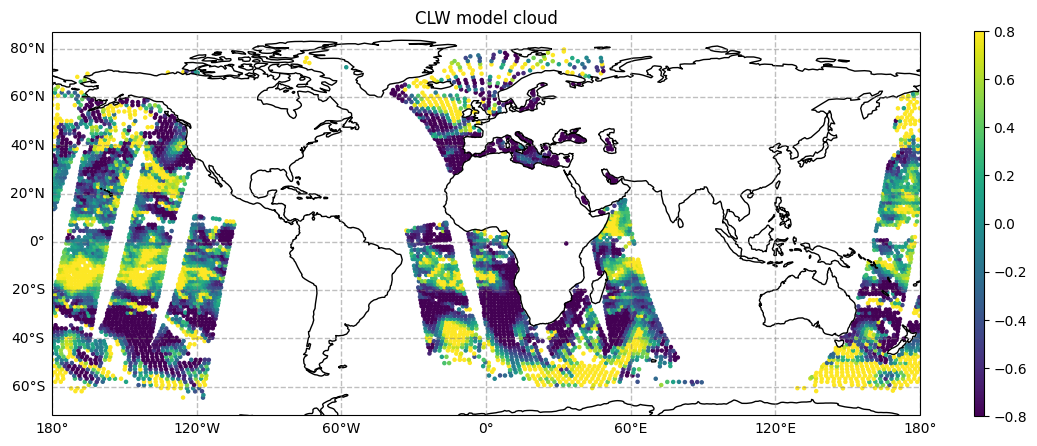

In [22]:
# check different cloud proxy
exp='test'

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()

norm_c = (clw_model_use[exp] - np.mean(clw_model_use[exp])) / np.std(clw_model_use[exp])
scatter = ax.scatter(lon_use[exp], lat_use[exp], c=norm_c,  s=5, vmin=-0.8, vmax=0.8, cmap='viridis')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'CLW model cloud')
cbar = fig.colorbar(scatter,location='right',aspect=40)
#cbar.set_label('dT (K)', fontsize=14)

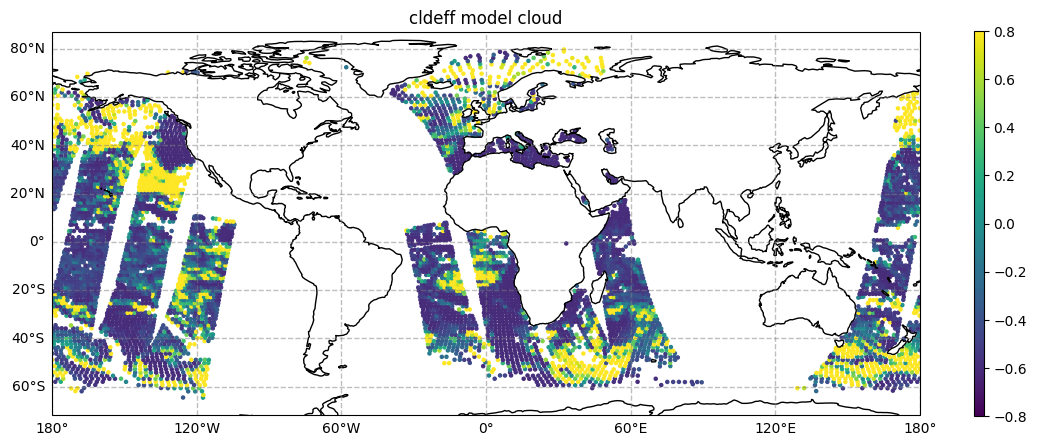

In [23]:
# check different cloud proxy
exp='test'

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()

norm_c = (cldeff_model_use[exp] - np.mean(cldeff_model_use[exp])) / np.std(cldeff_model_use[exp])
scatter = ax.scatter(lon_use[exp], lat_use[exp], c=norm_c,  s=5, vmin=-0.8, vmax=0.8, cmap='viridis')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'cldeff model cloud')
cbar = fig.colorbar(scatter,location='right',aspect=40)
#cbar.set_label('dT (K)', fontsize=14)

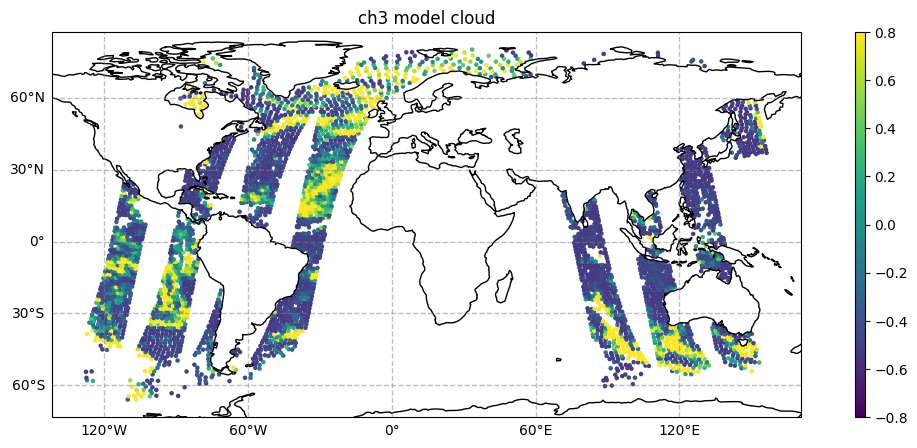

In [13]:
# check different cloud proxy
exp='test'

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()

norm_c = (cld_ch3_model_use[exp] - np.mean(cld_ch3_model_use[exp])) / np.std(cld_ch3_model_use[exp])
scatter = ax.scatter(lon_use[exp], lat_use[exp], c=norm_c,  s=5, vmin=-0.8, vmax=0.8, cmap='viridis')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'ch3 model cloud')
cbar = fig.colorbar(scatter,location='right',aspect=40)
#cbar.set_label('dT (K)', fontsize=14)

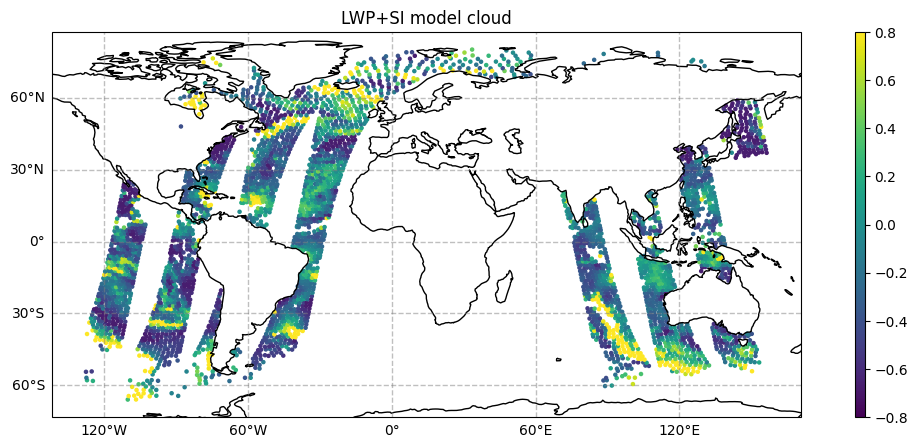

In [14]:
# check different cloud proxy
exp='test'

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()

norm_c = (cld_lwpsi_model_use[exp] - np.mean(cld_lwpsi_model_use[exp])) / np.std(cld_lwpsi_model_use[exp])
scatter = ax.scatter(lon_use[exp], lat_use[exp], c=norm_c,  s=5, vmin=-0.8, vmax=0.8, cmap='viridis')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'LWP+SI model cloud')
cbar = fig.colorbar(scatter,location='right',aspect=40)
#cbar.set_label('dT (K)', fontsize=14)

atms - channel 1 

model cloud corr =
 [[1.         0.72246838 0.70564791 0.97204976]
 [0.72246838 1.         0.95747987 0.70917136]
 [0.70564791 0.95747987 1.         0.65980699]
 [0.97204976 0.70917136 0.65980699 1.        ]] 

model cloud corr =
 [[1.         0.60626297 0.65828723 0.85939226]
 [0.60626297 1.         0.5844343  0.57229652]
 [0.65828723 0.5844343  1.         0.44552121]
 [0.85939226 0.57229652 0.44552121 1.        ]]


array([[1.        , 0.78852429, 0.83708937, 0.88020591],
       [0.78852429, 1.        , 0.80592457, 0.77443952],
       [0.83708937, 0.80592457, 1.        , 0.62599778],
       [0.88020591, 0.77443952, 0.62599778, 1.        ]])

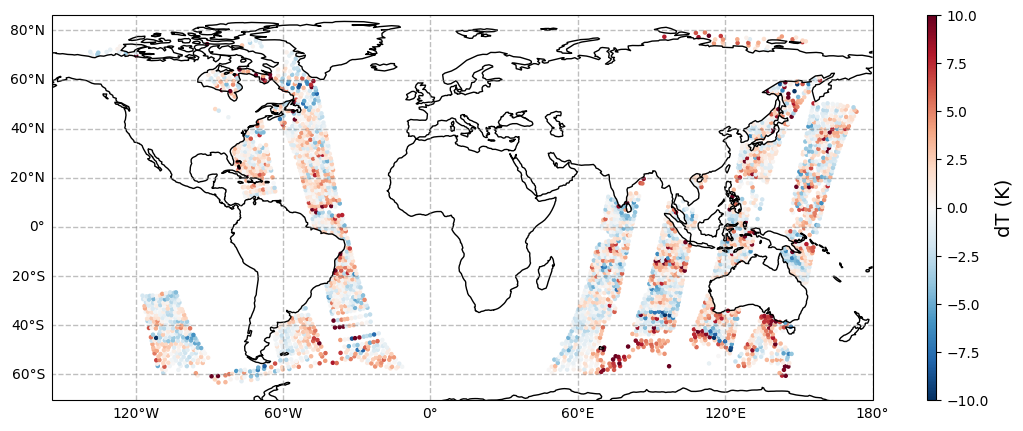

In [56]:
# check the obs dist

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter = ax.scatter(lon_use[exps[1]], lat_use[exps[1]], c=omf_use[exps[1]],  s=5, vmin=-10, vmax=10, cmap='RdBu_r')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{chn} {gesanl} {time}')
cbar = fig.colorbar(scatter,location='right',aspect=40)
cbar.set_label('dT (K)', fontsize=14)

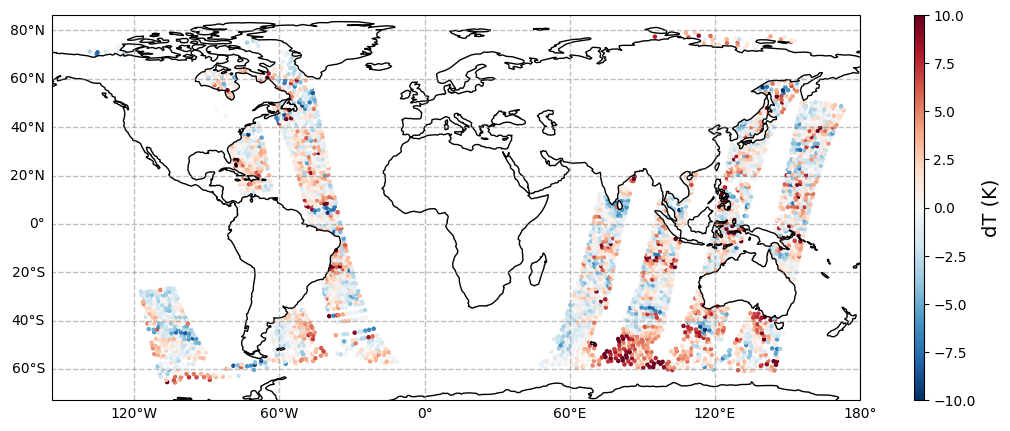

In [57]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter = ax.scatter(lon_use[exps[0]], lat_use[exps[0]], c=omf_use[exps[0]],  s=5, vmin=-10, vmax=10, cmap='RdBu_r')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{chn} {gesanl} {time}')
cbar = fig.colorbar(scatter,location='right',aspect=40)
cbar.set_label('dT (K)', fontsize=14)

In [58]:
len(lat_use[exps[0]])

3743

In [59]:
len(lat_use[exps[1]])

3438